In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv(join('..', '..', 'input', 'train_v2.csv'))

df_train = pd.concat([df_train['image_name'], df_train.tags.str.get_dummies(sep=' ')], axis=1)
all_labels = df_train.columns[1:].tolist()

df_labels = df_train[all_labels]

df_labels.head()

agriculture  artisinal_mine  bare_ground  blooming  blow_down  clear  \
0            0               0            0         0          0      0   
1            1               0            0         0          0      1   
2            0               0            0         0          0      1   
3            0               0            0         0          0      1   
4            1               0            0         0          0      1   

   cloudy  conventional_mine  cultivation  habitation  haze  partly_cloudy  \
0       0                  0            0           0     1              0   
1       0                  0            0           0     0              0   
2       0                  0            0           0     0              0   
3       0                  0            0           0     0              0   
4       0                  0            0           1     0              0   

   primary  road  selective_logging  slash_burn  water  
0        1     0                  0           0      0  
1        1     0                  0           0      1  
2        1     0                  0           0      0  
3        1     0                  0           0      0  
4        1     1                  0           0      0

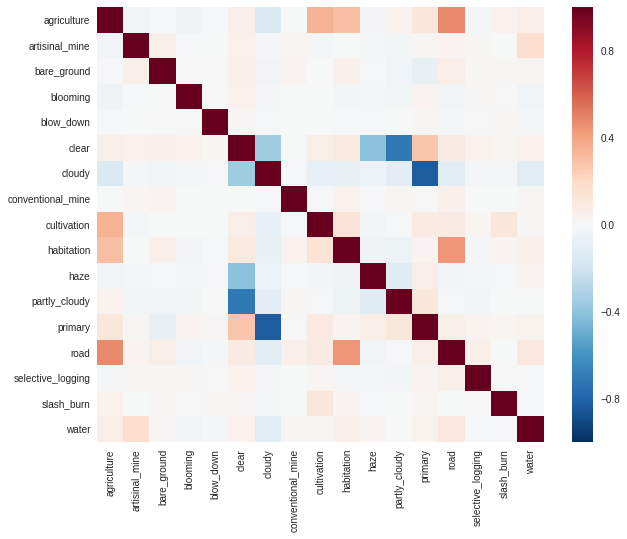

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_labels.corr())

In [4]:
df_labels.corr()

agriculture  artisinal_mine  bare_ground  blooming  \
agriculture           1.000000       -0.038379    -0.013854 -0.041082   
artisinal_mine       -0.038379        1.000000     0.061556 -0.008357   
bare_ground          -0.013854        0.061556     1.000000 -0.007722   
blooming             -0.041082       -0.008357    -0.007722  1.000000   
blow_down            -0.008538       -0.004527     0.006661  0.001094   
clear                 0.058765        0.040851     0.052982  0.046617   
cloudy               -0.154252       -0.021437    -0.034409 -0.021213   
conventional_mine    -0.006948        0.017270     0.027131 -0.004525   
cultivation           0.344964       -0.016849    -0.003458 -0.001502   
habitation            0.303979       -0.001561     0.050756 -0.024851   
haze                 -0.031978       -0.019118    -0.011276 -0.019903   
partly_cloudy         0.039743       -0.023888    -0.035959 -0.030380   
primary               0.115259        0.010236    -0.076070  0.025570   
road                  0.480930        0.028774     0.064728 -0.038526   
selective_logging    -0.022616        0.009365     0.010800  0.012640   
slash_burn            0.041518       -0.006621     0.013250  0.001092   
water                 0.063498        0.166084     0.021320 -0.031718   

                   blow_down     clear    cloudy  conventional_mine  \
agriculture        -0.008538  0.058765 -0.154252          -0.006948   
artisinal_mine     -0.004527  0.040851 -0.021437           0.017270   
bare_ground         0.006661  0.052982 -0.034409           0.027131   
blooming            0.001094  0.046617 -0.021213          -0.004525   
blow_down           1.000000  0.017776 -0.011492          -0.002452   
clear               0.017776  1.000000 -0.358343          -0.000257   
cloudy             -0.011492 -0.358343  1.000000          -0.011609   
conventional_mine  -0.002452 -0.000257 -0.011609           1.000000   
cultivation        -0.004550  0.065897 -0.082260          -0.011202   
habitation         -0.010273  0.097849 -0.073547           0.046781   
haze               -0.013162 -0.410428 -0.062324          -0.009305   
partly_cloudy      -0.005999 -0.718208 -0.109062           0.013052   
primary             0.013852  0.273743 -0.829594           0.002535   
road               -0.022068  0.084686 -0.116412           0.048653   
selective_logging   0.000974  0.040967 -0.021469          -0.004580   
slash_burn          0.010479  0.019757 -0.016805          -0.003585   
water              -0.019422  0.041464 -0.110432           0.009898   

                   cultivation  habitation      haze  partly_cloudy   primary  \
agriculture           0.344964    0.303979 -0.031978       0.039743  0.115259   
artisinal_mine       -0.016849   -0.001561 -0.019118      -0.023888  0.010236   
bare_ground          -0.003458    0.050756 -0.011276      -0.035959 -0.076070   
blooming             -0.001502   -0.024851 -0.019903      -0.030380  0.025570   
blow_down            -0.004550   -0.010273 -0.013162      -0.005999  0.013852   
clear                 0.065897    0.097849 -0.410428      -0.718208  0.273743   
cloudy               -0.082260   -0.073547 -0.062324      -0.109062 -0.829594   
conventional_mine    -0.011202    0.046781 -0.009305       0.013052  0.002535   
cultivation           1.000000    0.134639 -0.030414      -0.011306  0.092507   
habitation            0.134639    1.000000 -0.039675      -0.048390  0.025513   
haze                 -0.030414   -0.039675  1.000000      -0.124914  0.064862   
partly_cloudy        -0.011306   -0.048390 -0.124914       1.000000  0.110213   
primary               0.092507    0.025513  0.064862       0.110213  1.000000   
road                  0.079122    0.443341 -0.035642      -0.010596  0.058937   
selective_logging     0.017603   -0.016747 -0.019162      -0.023980  0.025879   
slash_burn            0.113073    0.026567 -0.015101      -0.004034  0.020257   
water                 0.009845    0.054555  0.03

In [5]:
from itertools import combinations

all_comb = {}

for comb_size in range(2, 5):
    for comb in combinations(all_labels, comb_size):
        all_comb[comb] = (df_labels[list(comb)].sum(axis=1) == 1).mean()

In [6]:
r = [(k, all_comb[k]) for k in sorted(all_comb.keys(), key=lambda k: all_comb[k])]
r[-20:]

[(('blooming', 'cloudy', 'primary', 'slash_burn'), 0.96501889868820867),
 (('artisinal_mine', 'cloudy', 'primary', 'slash_burn'), 0.96553768620766323),
 (('bare_ground', 'cloudy', 'primary'), 0.9658835445539663),
 (('blow_down', 'cloudy', 'primary', 'selective_logging'),
  0.96753872378270211),
 (('blooming', 'blow_down', 'cloudy', 'primary'), 0.96773635712344674),
 (('cloudy', 'conventional_mine', 'primary', 'selective_logging'),
  0.96776106129103978),
 (('blooming', 'cloudy', 'conventional_mine', 'primary'), 0.96795869463178441),
 (('artisinal_mine', 'blow_down', 'cloudy', 'primary'), 0.96827984881049434),
 (('artisinal_mine', 'cloudy', 'conventional_mine', 'primary'),
  0.9686257071567973),
 (('cloudy', 'primary', 'selective_logging'), 0.96993502803923026),
 (('blooming', 'cloudy', 'primary'), 0.97013266137997478),
 (('artisinal_mine', 'cloudy', 'primary'), 0.97070085723461552),
 (('blow_down', 'cloudy', 'primary', 'slash_burn'), 0.97079967390498778),
 (('cloudy', 'conventional_min

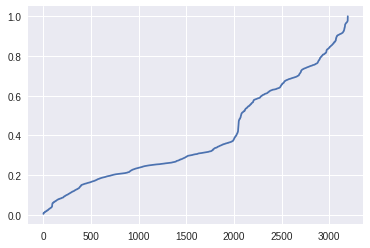

In [7]:
rv = [x[1] for x in r]
plt.plot(rv)

In [8]:
df_labels.mean()

agriculture          0.304232
artisinal_mine       0.008375
bare_ground          0.021295
blooming             0.008202
blow_down            0.002421
clear                0.702364
cloudy               0.051607
conventional_mine    0.002470
cultivation          0.110601
habitation           0.090417
haze                 0.066627
partly_cloudy        0.179377
primary              0.926727
road                 0.199387
selective_logging    0.008399
slash_burn           0.005163
water                0.183083
dtype: float64

In [9]:
from skimage.io import imread
tif_folder = '../../input/train-tif-v2'
jpg_folder = '../../input/train-jpg'

load_tif = lambda f: imread(join(tif_folder, f + '.tif'))
load_jpg = lambda f: imread(join(jpg_folder, f + '.jpg'))

In [10]:
# Load images
n_samples = 5000

imgs = map(load_tif, df_train.image_name.sample(n_samples, random_state=42))

imgs = np.array(imgs)

In [11]:
print("Means TIF:", np.mean(imgs, axis=(0,1,2)))
print("Stds TIF :", np.std(imgs, axis=(0,1,2)))

Means TIF: [ 4959.10174741  4239.91475582  3037.04620345  6402.610267  ]
Stds TIF : [ 1687.92136917  1530.25234241  1571.66463717  1841.37931887]


In [13]:
# Generate tif 3-channels
# NDVI = (NIR – Red)/(NIR + Red)
# ARVI = (NIR – RB) / (NIR+RB), RB = R – γ (B-R), γ = 1
# Green
def create_tif3(im):
    b, g, r, nir = im[...,0], im[...,1], im[...,2], im[...,3]
    nvdi = (nir-r) / (nir+r)
    gamma = 1
    rb = r - gamma * (b-r)
    arvi = (nir - rb) / (nir + rb)
    return np.stack([arvi, g, nvdi], axis=3)
    
    
tif3 = create_tif3(imgs)

In [14]:
print("Means TIF3:", np.mean(tif3, axis=(0,1,2)))
print("Stds TIF3 :", np.std(tif3, axis=(0,1,2)))

Means TIF3: [  2.86131277e-01   4.23991476e+03   6.35188672e-01]
Stds TIF3 : [    1.5692451   1530.25234241     2.67809347]


In [ ]:
imgs = map(load_jpg, df_train.image_name.sample(n_samples, random_state=42))

imgs = np.array(imgs)

print("Means JPG:", np.mean(imgs, axis=(0,1,2)))
print("Stds JPG :", np.std(imgs, axis=(0,1,2)))